<a href="https://colab.research.google.com/github/navaranjithsai/pothole/blob/main/prediction_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


>>> Predicted 0 = 1
>>> Predicted 1 = 1
>>> Predicted 2 = 0
>>> Predicted 3 = 1
>>> Predicted 4 = 1
>>> Predicted 5 = 1
>>> Predicted 6 = 1
>>> Predicted 7 = 1
>>> Predicted 8 = 0
>>> Predicted 9 = 0
>>> Predicted 10 = 1
>>> Predicted 11 = 0
>>> Predicted 12 = 0
>>> Predicted 13 = 0
>>> Predicted 14 = 0
>>> Predicted 15 = 0

1/1 [==============================] - 0s 397ms/step - loss: 0.4451 - accuracy: 0.8750
Test Accuracy:  87.5 %


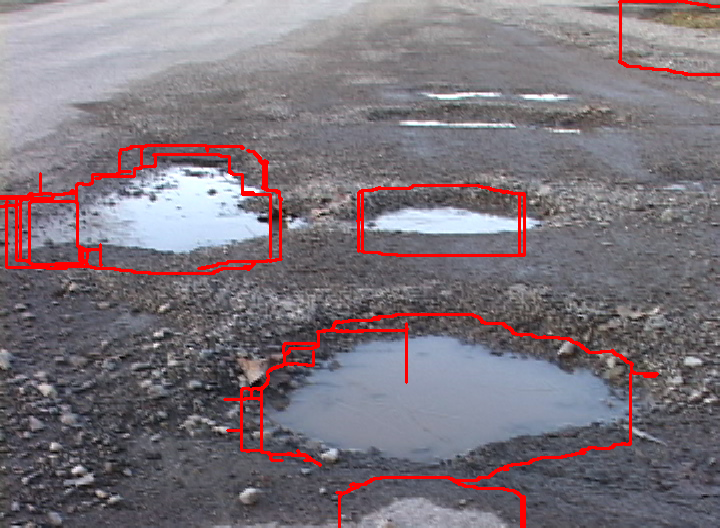

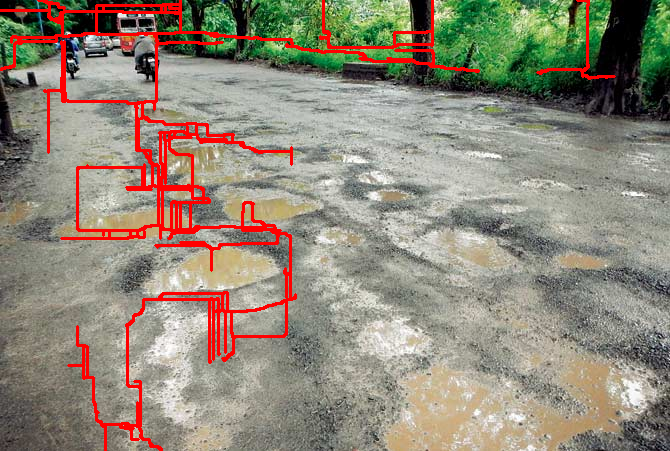

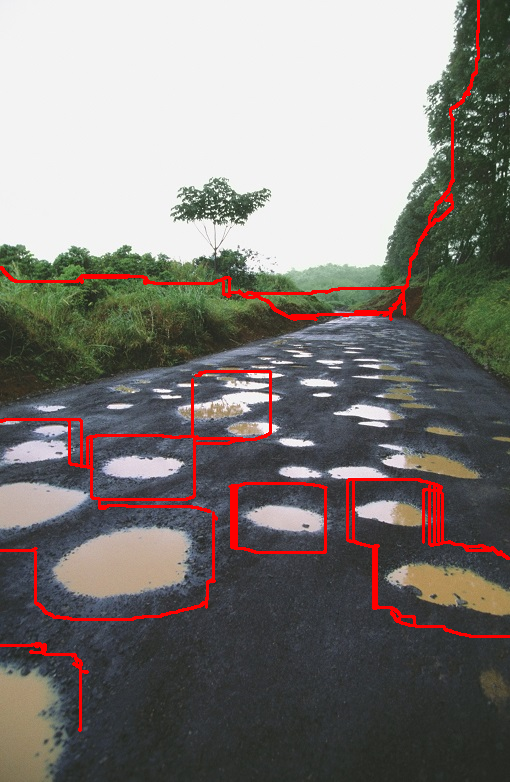

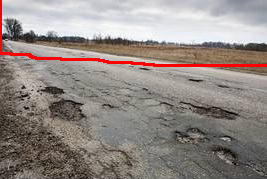

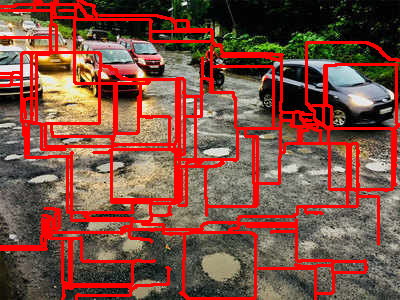

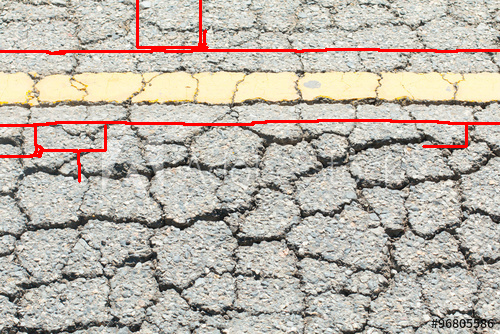

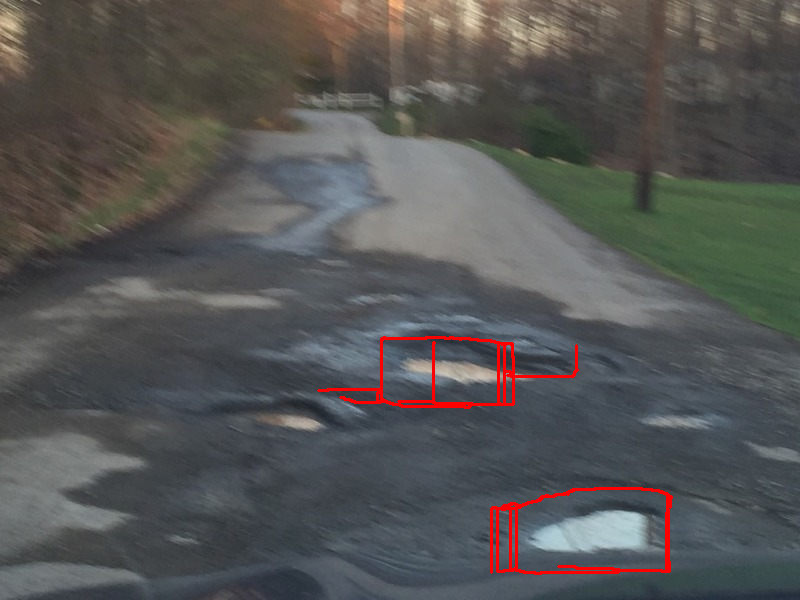

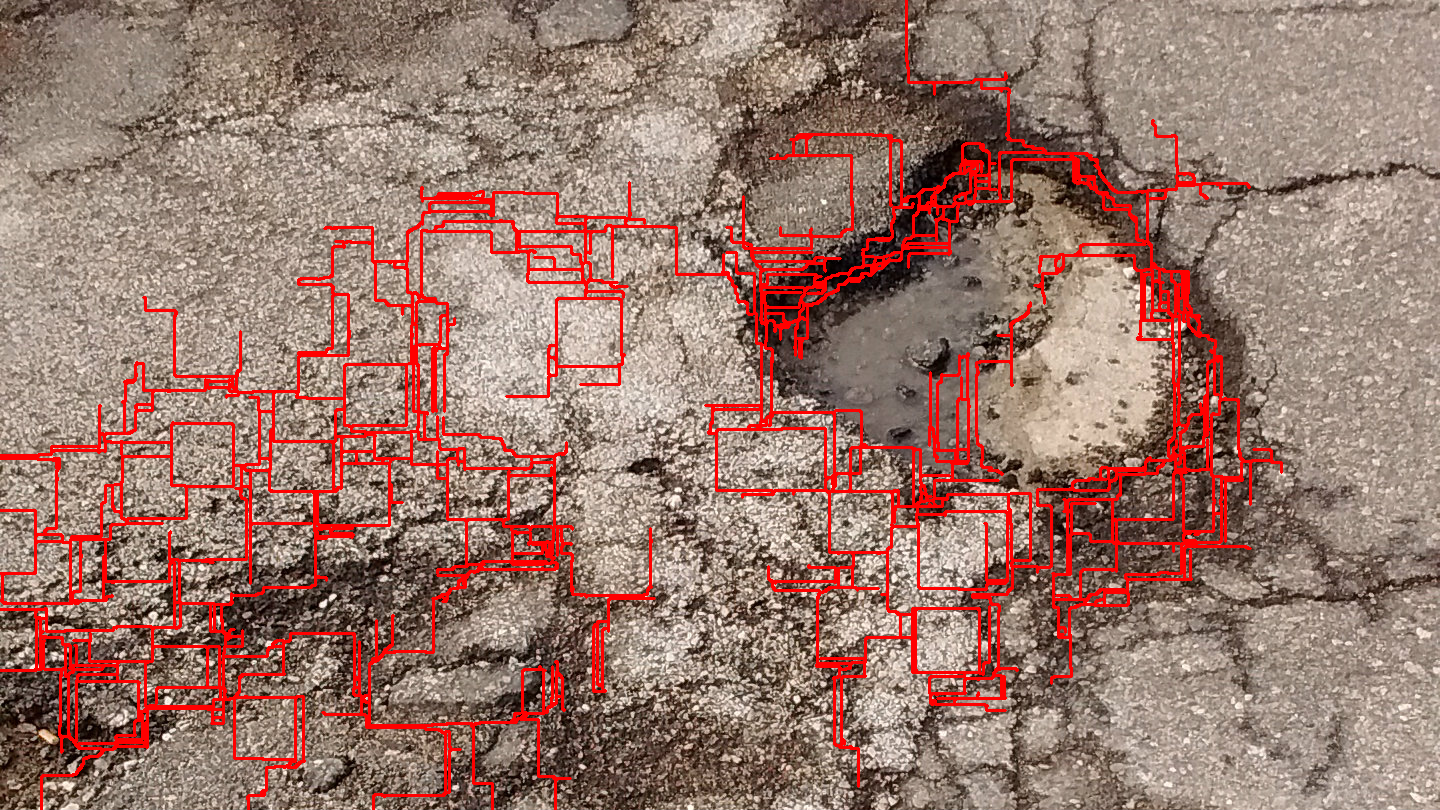

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import glob
from keras.models import Sequential
from keras.models import load_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from matplotlib import pyplot as plt
global size


size = 300
model = Sequential()
model = load_model("/content/drive/MyDrive/Pothhole1/finalmodel.h5")



nonPotholeTestImages = glob.glob("/content/drive/MyDrive/Colab Notebooks/Pothhole/My Dataset/test/Plain/*.jpg")

test2 = [cv2.imread(img,0) for img in nonPotholeTestImages]
for i in range(0,len(test2)):
    test2[i] = cv2.resize(test2[i],(size,size))
temp4 = np.asarray(test2)

potholeTestImages = glob.glob("/content/drive/MyDrive/Colab Notebooks/Pothhole/My Dataset/test/Pothole/*.jpg")

test1 = [cv2.imread(img,0) for img in potholeTestImages]
# train2[train2 != np.array(None)]
for i in range(0,len(test1)):
    test1[i] = cv2.resize(test1[i],(size,size))
temp3 = np.asarray(test1)
X_test = []
X_test.extend(temp3)
X_test.extend(temp4)
X_test = np.asarray(X_test)
X_test = X_test.reshape(X_test.shape[0], size, size, 1)
y_test1 = np.ones([temp3.shape[0]],dtype = int)
y_test2 = np.zeros([temp4.shape[0]],dtype = int)
y_test = []
y_test.extend(y_test1)
y_test.extend(y_test2)
y_test = np.asarray(y_test)
y_test = np_utils.to_categorical(y_test)
print("-------------------------------------------------------")
X_test = X_test/255
tests = model.predict_classes(X_test)
for i in range(len(X_test)):
	print(">>> Predicted %d = %s" % (i,tests[i]))

print("")
metrics = model.evaluate(X_test, y_test)
print("Test Accuracy: ",metrics[1]*100,"%")
for x in range(1,9):
    img = cv2.imread(f"/content/drive/MyDrive/Colab Notebooks/Pothhole/My Dataset/test/Pothole/{x}.jpg")#image1
    blur = cv2.blur(img,(5,5))
    gblur = cv2.GaussianBlur(img,(5,5),0)
    median = cv2.medianBlur(img,5)
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(median,kernel,iterations = 4)
    dilation = cv2.dilate(erosion,kernel,iterations = 15)
    closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
    edges = cv2.Canny(closing,9,420)
    edges = cv2.Canny(dilation,9,220)
    ret,threshold=cv2.threshold(edges.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    contours,_=cv2.findContours(threshold,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(img,contours,-1,(0,0,255),2)
    cv2_imshow(img)
    plt.show()
    cv2.waitKey(0)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
